### OBJECTIVES:
## The first objective of this project is to predict the final score of the first innings (20 overs) in the innings' midway (10th over) and second is to predict the win percent of a team in the second innings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
import math

In [2]:
score = pd.read_csv(r'C:\Users\pnish\OneDrive\Documents\Projects\IPL\IPL Ball-by-Ball 2008-2020.csv')
score

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [4]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [5]:
np.unique(score.id).shape

(816,)

In [6]:
match = pd.read_csv(r'C:\Users\pnish\OneDrive\Documents\Projects\IPL\IPL Matches 2008-2020.csv')
match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

### Data Preparation

The score at the end of tenth over is needed as on the features and the final score is needed as it is the response variable.<br> To obtain these, the data should be grouped by the id and innings. Then the sum of total score column should be aggregated for each group.

In [8]:
#This is to get the final scores
score_grpd = score.groupby(['id','inning'],as_index=False)

In [9]:
score_final = score_grpd.agg({'total_runs': 'sum','is_wicket': 'sum', 'over':'max'})
score_final

,id,inning,total_runs,is_wicket,over
0,335982,1,222,3,19
1,335982,2,82,10,15
2,335983,1,240,5,19
3,335983,2,207,4,19
4,335984,1,129,8,19
...,...,...,...,...,...
1625,1237178,2,132,4,19
1626,1237180,1,189,3,19
1627,1237180,2,172,8,19
1628,1237181,1,156,7,19


In [10]:
#The score at the end of 10th over is as follows
score_10 = score[score.over<=9]
score_10

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193441,1237181,1,9,2,RR Pant,SS Iyer,KH Pandya,6,0,6,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193442,1237181,1,9,3,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193443,1237181,1,9,4,SS Iyer,RR Pant,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193444,1237181,1,9,5,RR Pant,SS Iyer,KH Pandya,6,0,6,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [11]:
score_10_grpd = score_10.groupby(['id','inning'],as_index=False)

In [12]:
score_10_end = score_10_grpd.agg({'total_runs': 'sum','is_wicket': 'sum'})
score_10_end

,id,inning,total_runs,is_wicket
0,335982,1,87,1
1,335982,2,51,7
2,335983,1,88,3
3,335983,2,110,1
4,335984,1,57,4
...,...,...,...,...
1625,1237178,2,60,3
1626,1237180,1,102,1
1627,1237180,2,75,3
1628,1237181,1,75,3


In [13]:
data = score_10_end.merge(score_final, on=['id','inning'],how='inner')
data

,id,inning,total_runs_x,is_wicket_x,total_runs_y,is_wicket_y,over
0,335982,1,87,1,222,3,19
1,335982,2,51,7,82,10,15
2,335983,1,88,3,240,5,19
3,335983,2,110,1,207,4,19
4,335984,1,57,4,129,8,19
...,...,...,...,...,...,...,...
1625,1237178,2,60,3,132,4,19
1626,1237180,1,102,1,189,3,19
1627,1237180,2,75,3,172,8,19
1628,1237181,1,75,3,156,7,19


In [14]:
data = data.rename(columns={'total_runs_x':'runs_10','is_wicket_x':'wickets_10','total_runs_y':'runs_final','is_wicket_y':'wickets_final'})
data

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over
0,335982,1,87,1,222,3,19
1,335982,2,51,7,82,10,15
2,335983,1,88,3,240,5,19
3,335983,2,110,1,207,4,19
4,335984,1,57,4,129,8,19
...,...,...,...,...,...,...,...
1625,1237178,2,60,3,132,4,19
1626,1237180,1,102,1,189,3,19
1627,1237180,2,75,3,172,8,19
1628,1237181,1,75,3,156,7,19


In [15]:
data = data.merge(match, on = ['id'], how = 'inner')
data

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,date,player_of_match,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,87,1,222,3,19,Bangalore,2008-04-18,BB McCullum,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,2,51,7,82,10,15,Bangalore,2008-04-18,BB McCullum,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335983,1,88,3,240,5,19,Chandigarh,2008-04-19,MEK Hussey,...,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
3,335983,2,110,1,207,4,19,Chandigarh,2008-04-19,MEK Hussey,...,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
4,335984,1,57,4,129,8,19,Delhi,2008-04-19,MF Maharoof,...,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,1237178,2,60,3,132,4,19,Abu Dhabi,2020-11-06,KS Williamson,...,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
1626,1237180,1,102,1,189,3,19,Abu Dhabi,2020-11-08,MP Stoinis,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
1627,1237180,2,75,3,172,8,19,Abu Dhabi,2020-11-08,MP Stoinis,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
1628,1237181,1,75,3,156,7,19,Dubai,2020-11-10,TA Boult,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [16]:
data.team1.value_counts()

Royal Challengers Bangalore    215
Mumbai Indians                 194
Kolkata Knight Riders          190
Chennai Super Kings            188
Kings XI Punjab                184
Delhi Daredevils               165
Rajasthan Royals               140
Sunrisers Hyderabad            118
Deccan Chargers                 78
Pune Warriors                   46
Delhi Capitals                  38
Gujarat Lions                   32
Rising Pune Supergiants         14
Rising Pune Supergiant          14
Kochi Tuskers Kerala            14
Name: team1, dtype: int64

Two different names for the same team is seen := Rising Pune Supergiant, Rising Pune Supergiants. Need to replace all by Rising Pune Supergiants.

In [17]:
data = data.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})

In [18]:
data.team1.value_counts()

Royal Challengers Bangalore    215
Mumbai Indians                 194
Kolkata Knight Riders          190
Chennai Super Kings            188
Kings XI Punjab                184
Delhi Daredevils               165
Rajasthan Royals               140
Sunrisers Hyderabad            118
Deccan Chargers                 78
Pune Warriors                   46
Delhi Capitals                  38
Gujarat Lions                   32
Rising Pune Supergiants         28
Kochi Tuskers Kerala            14
Name: team1, dtype: int64

## 1. TO PREDICT THE FINAL SCORE OF THE FIRST INNINGS

In [19]:
data1 = data[data.inning==1]
data1

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,date,player_of_match,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,87,1,222,3,19,Bangalore,2008-04-18,BB McCullum,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335983,1,88,3,240,5,19,Chandigarh,2008-04-19,MEK Hussey,...,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
4,335984,1,57,4,129,8,19,Delhi,2008-04-19,MF Maharoof,...,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
6,335985,1,74,3,165,7,19,Mumbai,2008-04-20,MV Boucher,...,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
8,335986,1,52,4,110,10,18,Kolkata,2008-04-20,DJ Hussey,...,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,1216547,1,85,1,201,3,19,Dubai,2020-09-28,AB de Villiers,...,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
1622,1237177,1,93,2,200,5,19,Dubai,2020-11-05,JJ Bumrah,...,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
1624,1237178,1,54,2,131,7,19,Abu Dhabi,2020-11-06,KS Williamson,...,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
1626,1237180,1,102,1,189,3,19,Abu Dhabi,2020-11-08,MP Stoinis,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [20]:
data1 = data1.reset_index(drop=True)

### DATA PREPARATION AND EDA

#### 1. Analyzing the scores after 10 overs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8738F1F08>]],
      dtype=object)

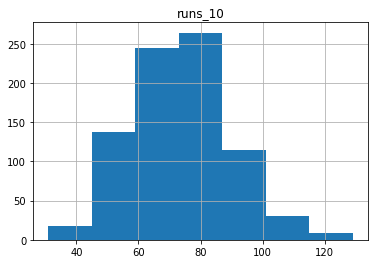

In [21]:
data1.hist(column='runs_10',bins=7)

There are few very low scores at the end of ten overs. Generally the score will be over 60. Need to analyse these low scores.

In [22]:
low_score_10 = data1[data1.runs_10<40]
low_score_10

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,date,player_of_match,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
61,392184,1,31,3,101,10,19,Cape Town,2009-04-19,RP Singh,...,Kolkata Knight Riders,Kolkata Knight Riders,bat,Deccan Chargers,wickets,8.0,N,NaN,MR Benson,BR Doctrove
205,501229,1,37,3,129,7,19,Kochi,2011-04-27,I Sharma,...,Deccan Chargers,Kochi Tuskers Kerala,field,Deccan Chargers,runs,55.0,N,NaN,HDPK Dharmasena,AL Hill
242,501266,1,36,4,128,8,19,Bangalore,2011-05-22,CH Gayle,...,Chennai Super Kings,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,K Hariharan,RE Koertzen
327,598003,1,38,5,99,9,19,Pune,2013-04-07,M Vohra,...,Kings XI Punjab,Pune Warriors,bat,Kings XI Punjab,wickets,8.0,N,NaN,S Asnani,SJA Taufel
538,980943,1,39,5,118,8,19,Hyderabad,2016-04-26,AB Dinda,...,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,runs,34.0,N,D/L,AY Dandekar,CK Nandan
611,1082626,1,37,6,67,10,17,Chandigarh,2017-04-30,Sandeep Sharma,...,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,10.0,N,NaN,YC Barde,CK Nandan
758,1216494,1,36,5,84,8,19,Abu Dhabi,2020-10-21,Mohammed Siraj,...,Royal Challengers Bangalore,Kolkata Knight Riders,bat,Royal Challengers Bangalore,wickets,8.0,N,NaN,VK Sharma,S Ravi


There seems to be no issues with these low scoring innings.

#### 2. Analyzing the final scores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F87415CC48>]],
      dtype=object)

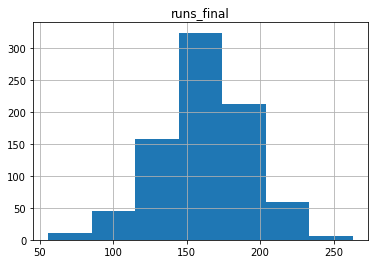

In [23]:
data1.hist(column='runs_final',bins=7)

There are few innings with a very low scores (<80). Need to analyze those score.

In [24]:
data1[data1.runs_final<80]

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,date,player_of_match,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
39,336021,1,44,6,67,10,15,Mumbai,2008-05-16,SM Pollock,...,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,8.0,N,NaN,BR Doctrove,DJ Harper
241,501265,1,55,3,56,3,10,Delhi,2011-05-21,NaN,...,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
411,729305,1,45,6,70,10,14,Abu Dhabi,2014-04-26,PV Tambe,...,Royal Challengers Bangalore,Rajasthan Royals,field,Rajasthan Royals,wickets,6.0,N,NaN,HDPK Dharmasena,C Shamshuddin
611,1082626,1,37,6,67,10,17,Chandigarh,2017-04-30,Sandeep Sharma,...,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,10.0,N,NaN,YC Barde,CK Nandan
630,1082645,1,55,6,73,10,15,Pune,2017-05-14,JD Unadkat,...,Kings XI Punjab,Rising Pune Supergiants,field,Rising Pune Supergiants,wickets,9.0,N,NaN,AY Dandekar,A Deshmukh
696,1175356,1,49,5,70,10,17,Chennai,2019-03-23,Harbhajan Singh,...,Royal Challengers Bangalore,Chennai Super Kings,field,Chennai Super Kings,wickets,7.0,N,NaN,AY Dandekar,BNJ Oxenford
744,1178424,1,62,7,62,7,4,Bengaluru,2019-04-30,NaN,...,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


There are no issues with these records. The innings with the id 1178424 was shortened to  overs due to rain. Therefore both the scores (10th over score and final score) are same.

#### 3. Analyzing No results matches

In [25]:
data1[data1.result.isna()]

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,date,player_of_match,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,1,55,3,56,3,10,Delhi,2011-05-21,NaN,...,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,1,83,2,200,7,19,Bangalore,2015-04-29,NaN,...,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,1,91,1,187,5,19,Bangalore,2015-05-17,NaN,...,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,1,62,7,62,7,4,Bengaluru,2019-04-30,NaN,...,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


The record with id 1178424 seems to be an outlier like seen above since the number of overs for that particular match was restricted to 5. Keeping this record in the data now and it can be removed later if it has an issue.

#### 4. Analyzing the innings with less number of overs played

In [26]:
data1[(data1.over<15)]

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,date,player_of_match,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,1,115,2,118,4,10,Delhi,2008-05-17,DPMD Jayawardene,...,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
60,392183,1,91,3,104,7,11,Cape Town,2009-04-19,DL Vettori,...,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
231,501255,1,58,3,89,4,12,Bangalore,2011-05-14,CH Gayle,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,N,D/L,RE Koertzen,RB Tiffin
241,501265,1,55,3,56,3,10,Delhi,2011-05-21,NaN,...,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
249,548307,1,85,6,97,9,11,Kolkata,2012-04-05,IK Pathan,...,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,wickets,8.0,N,NaN,S Asnani,HDPK Dharmasena
392,598068,1,106,2,106,2,7,Bangalore,2013-05-18,V Kohli,...,Chennai Super Kings,Chennai Super Kings,field,Royal Challengers Bangalore,runs,24.0,N,NaN,C Shamshuddin,RJ Tucker
411,729305,1,45,6,70,10,14,Abu Dhabi,2014-04-26,PV Tambe,...,Royal Challengers Bangalore,Rajasthan Royals,field,Rajasthan Royals,wickets,6.0,N,NaN,HDPK Dharmasena,C Shamshuddin
490,829771,1,111,4,111,4,9,Bangalore,2015-05-02,Mandeep Singh,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,JD Cloete,PG Pathak
506,829803,1,106,6,106,6,9,Chandigarh,2015-05-13,AR Patel,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kings XI Punjab,runs,22.0,N,NaN,JD Cloete,C Shamshuddin
508,829807,1,125,2,135,3,10,Hyderabad,2015-05-15,V Kohli,...,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Royal Challengers Bangalore,wickets,6.0,N,D/L,AK Chaudhary,HDPK Dharmasena


There are 4 records with the total overs played less than 10. So these have the same 10th over and final score. Keeping these as such in the data and will build the model to see how the model works for these data.<br>
If there is any issue later, then would come back and make the necessary changes.

#### 5. Removing unwanted columns 

In [27]:
data1.columns

Index(['id', 'inning', 'runs_10', 'wickets_10', 'runs_final', 'wickets_final',
       'over', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [28]:
data1 = data1.drop(columns=['date','player_of_match','neutral_venue','result','result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'])
data1

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,venue,team1,team2,toss_winner,toss_decision,winner
0,335982,1,87,1,222,3,19,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,335983,1,88,3,240,5,19,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,335984,1,57,4,129,8,19,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,335985,1,74,3,165,7,19,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,335986,1,52,4,110,10,18,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,1,85,1,201,3,19,Dubai,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore
812,1237177,1,93,2,200,5,19,Dubai,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians
813,1237178,1,54,2,131,7,19,Abu Dhabi,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad
814,1237180,1,102,1,189,3,19,Abu Dhabi,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals


#### 6. Changing venue to Home, Away or Neutral

Need to create a home ground for the teams to map the venue type.

In [29]:
print("The below picture shows the flow to calculate the venue of each innings")

The below picture shows the flow to calculate the venue of each innings


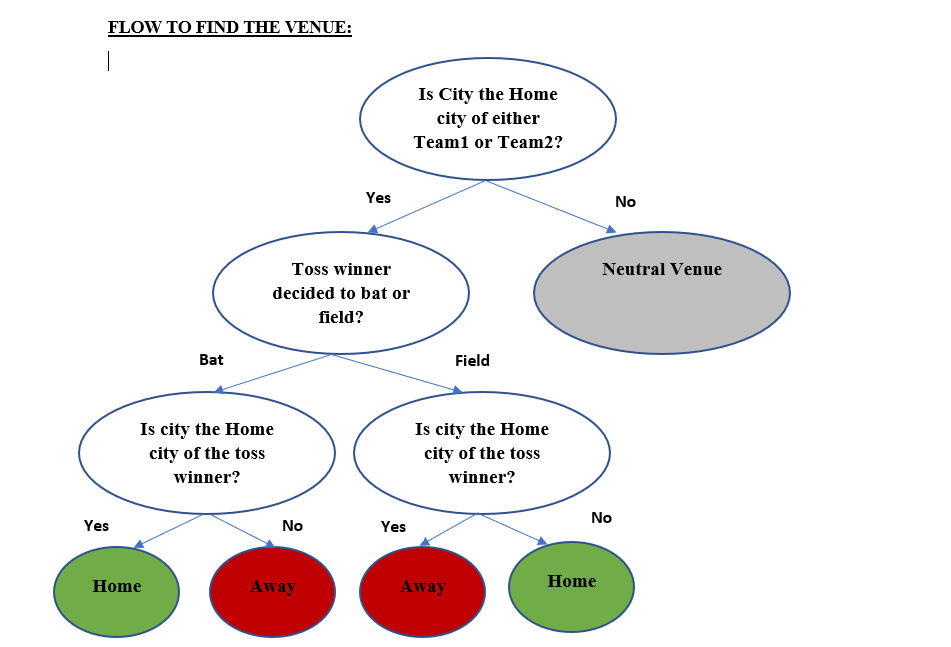

In [30]:
np.unique(data1.team1)

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [31]:
home_city = {'Chennai Super Kings' : ['Chennai'],
            'Deccan Chargers' : ['Hyderabad','Nagpur'],
            'Mumbai Indians' : ['Mumbai'],
            'Delhi Capitals' : ['Delhi'],
            'Delhi Daredevils': ['Delhi','Raipur'],
            'Gujarat Lions' : ['Rajkot','Kanpur'], 
            'Kings XI Punjab' : ['Chandigarh','Indore','Dharamsala','Cuttack'],
            'Kochi Tuskers Kerala' : ['Kochi'],
            'Kolkata Knight Riders' : ['Kolkata'],
            'Pune Warriors' : ['Pune'],
            'Rajasthan Royals' : ['Jaipur'],
            'Rising Pune Supergiants' : ['Pune'],
            'Royal Challengers Bangalore' : ['Bangalore','Bengaluru'],
            'Sunrisers Hyderabad' : ['Hyderabad']}

In [32]:
for i in range(len(data1)):
    if (data1.city[i] in home_city[data1.team2[i]]) | (data1.city[i] in home_city[data1.team1[i]]): #To confirm that the venue is not a neutral venue
        if ((data.toss_decision[i]=='bat') & (data.city[i] in home_city[data1.toss_winner[i]])) | ((data.toss_decision[i]=='field') & (data.city[i] not in home_city[data1.toss_winner[i]])):
            data1['venue'][i] = 'Home'
        else:
            data1['venue'][i] = 'Away'
    else:
        data1['venue'][i] = 'Neutral'

In [33]:
data1

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,venue,team1,team2,toss_winner,toss_decision,winner
0,335982,1,87,1,222,3,19,Bangalore,Away,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,335983,1,88,3,240,5,19,Chandigarh,Home,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,335984,1,57,4,129,8,19,Delhi,Away,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,335985,1,74,3,165,7,19,Mumbai,Away,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,335986,1,52,4,110,10,18,Kolkata,Away,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,1,85,1,201,3,19,Dubai,Neutral,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore
812,1237177,1,93,2,200,5,19,Dubai,Neutral,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians
813,1237178,1,54,2,131,7,19,Abu Dhabi,Neutral,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad
814,1237180,1,102,1,189,3,19,Abu Dhabi,Neutral,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals


In [34]:
data1.venue.value_counts()

Away       327
Home       271
Neutral    218
Name: venue, dtype: int64

#### 7. Gettiing the team batting and team fielding features

In [35]:
print("The picture below shows the flow logic to determine the batting and fielding teams")

The picture below shows the flow logic to determine the batting and fielding teams


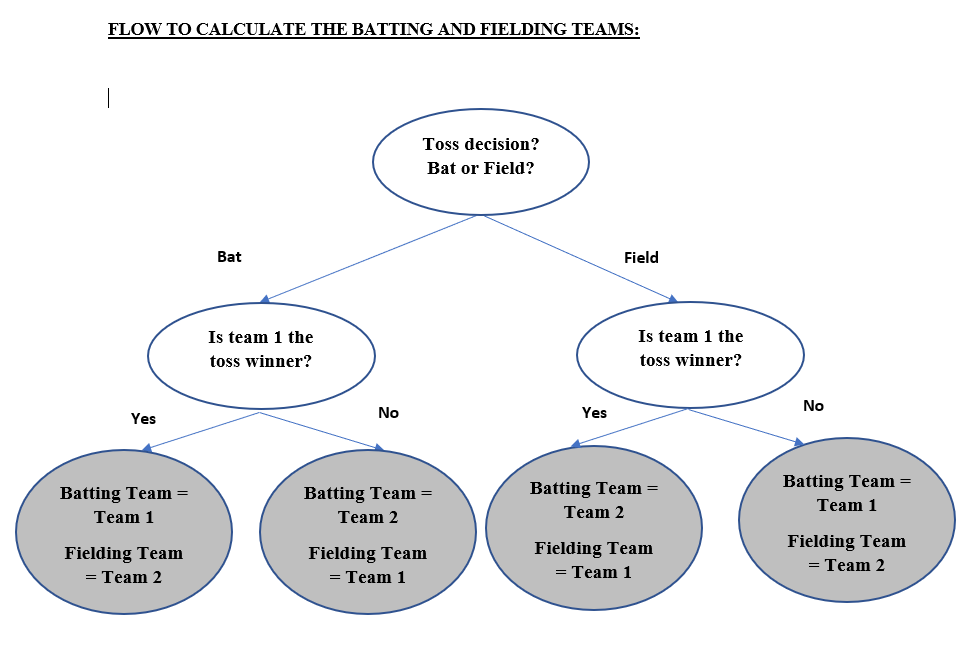

In [36]:
data1['batting_team'] = np.zeros(len(data1))
data1['fielding_team'] = np.zeros(len(data1))
for i in range(len(data1)):
    if data1.toss_decision[i] == 'bat':
        if data1.team1[i] == data1.toss_winner[i]:
            data1['batting_team'][i] = data1.team1[i]
            data1['fielding_team'][i] = data1.team2[i]
        else:
            data1['batting_team'][i] = data1.team2[i]
            data1['fielding_team'][i] = data1.team1[i]
    else:
        if data1.team1[i] == data1.toss_winner[i]:
            data1['batting_team'][i] = data1.team2[i]
            data1['fielding_team'][i] = data1.team1[i]
        else:
            data1['batting_team'][i] = data1.team1[i]
            data1['fielding_team'][i] = data1.team2[i]

In [37]:
print(data1['batting_team'].value_counts())
print('\n',data1['fielding_team'].value_counts())

Mumbai Indians                 110
Kings XI Punjab                 97
Royal Challengers Bangalore     95
Chennai Super Kings             93
Kolkata Knight Riders           93
Delhi Daredevils                72
Rajasthan Royals                71
Sunrisers Hyderabad             69
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  17
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: batting_team, dtype: int64

 Royal Challengers Bangalore    100
Kolkata Knight Riders           99
Kings XI Punjab                 93
Mumbai Indians                  93
Rajasthan Royals                90
Delhi Daredevils                89
Chennai Super Kings             85
Sunrisers Hyderabad             55
Deccan Chargers                 32
Pune Warriors                   26
Gujarat Lions                   16
Delhi Capitals                  16
Rising Pune Supergiants         15
Kochi Tuskers Kerala

In [38]:
data1

,id,inning,runs_10,wickets_10,runs_final,wickets_final,over,city,venue,team1,team2,toss_winner,toss_decision,winner,batting_team,fielding_team
0,335982,1,87,1,222,3,19,Bangalore,Away,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore
1,335983,1,88,3,240,5,19,Chandigarh,Home,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,Kings XI Punjab
2,335984,1,57,4,129,8,19,Delhi,Away,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
3,335985,1,74,3,165,7,19,Mumbai,Away,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,335986,1,52,4,110,10,18,Kolkata,Away,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,1,85,1,201,3,19,Dubai,Neutral,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,Royal Challengers Bangalore,Mumbai Indians
812,1237177,1,93,2,200,5,19,Dubai,Neutral,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,Mumbai Indians,Delhi Capitals
813,1237178,1,54,2,131,7,19,Abu Dhabi,Neutral,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
814,1237180,1,102,1,189,3,19,Abu Dhabi,Neutral,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,Delhi Capitals,Sunrisers Hyderabad


#### 8. Removing redundant rows

Now since we have the venue, the city column can be dropped. Similarly the toss_winner, team1, team2 columns can be dropped. The other renundant columns that can be dropped are id, inning and winner.

In [39]:
data1 = data1.drop(columns=['city','toss_winner','team1','team2','id','inning','winner'])

In [40]:
data1

,runs_10,wickets_10,runs_final,wickets_final,over,venue,toss_decision,batting_team,fielding_team
0,87,1,222,3,19,Away,field,Kolkata Knight Riders,Royal Challengers Bangalore
1,88,3,240,5,19,Home,bat,Chennai Super Kings,Kings XI Punjab
2,57,4,129,8,19,Away,bat,Rajasthan Royals,Delhi Daredevils
3,74,3,165,7,19,Away,bat,Mumbai Indians,Royal Challengers Bangalore
4,52,4,110,10,18,Away,bat,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...
811,85,1,201,3,19,Neutral,field,Royal Challengers Bangalore,Mumbai Indians
812,93,2,200,5,19,Neutral,field,Mumbai Indians,Delhi Capitals
813,54,2,131,7,19,Neutral,field,Royal Challengers Bangalore,Sunrisers Hyderabad
814,102,1,189,3,19,Neutral,bat,Delhi Capitals,Sunrisers Hyderabad


### SEPARATING THE DATA INTO X & Y

In [41]:
X = data1.drop(columns=['runs_final','wickets_final'])
runs = data1['runs_final']
wickets = data1['wickets_final']

### Encoding categorical variables

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   runs_10        816 non-null    int64 
 1   wickets_10     816 non-null    int64 
 2   over           816 non-null    int64 
 3   venue          816 non-null    object
 4   toss_decision  816 non-null    object
 5   batting_team   816 non-null    object
 6   fielding_team  816 non-null    object
dtypes: int64(3), object(4)
memory usage: 44.8+ KB


In [43]:
enc = OrdinalEncoder()
X.iloc[:,3:] = enc.fit_transform(X.iloc[:,3:])

In [44]:
enc.categories_

[array(['Away', 'Home', 'Neutral'], dtype=object),
 array(['bat', 'field'], dtype=object),
 array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
        'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
        'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
        'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants',
        'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
 array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
        'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
        'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
        'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants',
        'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)]

In [45]:
X

,runs_10,wickets_10,over,venue,toss_decision,batting_team,fielding_team
0,87,1,19,0.0,1.0,7.0,12.0
1,88,3,19,1.0,0.0,0.0,5.0
2,57,4,19,0.0,0.0,10.0,3.0
3,74,3,19,0.0,0.0,8.0,12.0
4,52,4,18,0.0,0.0,1.0,7.0
...,...,...,...,...,...,...,...
811,85,1,19,2.0,1.0,12.0,8.0
812,93,2,19,2.0,1.0,8.0,2.0
813,54,2,19,2.0,1.0,12.0,13.0
814,102,1,19,2.0,0.0,2.0,13.0


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   runs_10        816 non-null    int64  
 1   wickets_10     816 non-null    int64  
 2   over           816 non-null    int64  
 3   venue          816 non-null    float64
 4   toss_decision  816 non-null    float64
 5   batting_team   816 non-null    float64
 6   fielding_team  816 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 44.8 KB


### Train test splitting

In [47]:
X_train, X_test, runs_train, runs_test, wickets_train, wickets_test = train_test_split(X, runs, wickets, test_size=0.2,random_state=42)

In [106]:
X_test

,runs_10,wickets_10,over,venue,toss_decision,batting_team,fielding_team
196,106,2,19,1.0,1.0,5.0,10.0
299,86,2,19,0.0,1.0,5.0,1.0
744,62,7,4,0.0,1.0,12.0,10.0
227,86,1,19,1.0,1.0,5.0,8.0
541,85,1,19,0.0,1.0,11.0,4.0
...,...,...,...,...,...,...,...
442,84,1,19,0.0,1.0,3.0,5.0
760,119,1,19,2.0,1.0,10.0,0.0
714,52,3,19,0.0,1.0,8.0,13.0
666,82,2,19,0.0,1.0,12.0,8.0


### Checking the performance of a Random Forest Regressor with default parameters

In [48]:
rf = RandomForestRegressor()
rf.fit(X_train,runs_train)
runs_train_pred = rf.predict(X_train)
runs_test_pred = rf.predict(X_test)
print('The training RMSE is: ',math.sqrt(mean_squared_error(runs_train,runs_train_pred)))
print('The testing RMSE is: ',math.sqrt(mean_squared_error(runs_test,runs_test_pred)))

The training RMSE is:  7.899718578899471
The testing RMSE is:  19.95021370140873


In [50]:
test_pred_df = pd.DataFrame({'true':np.array(runs_test),'pred':runs_test_pred},runs_test.index)
test_pred_df

,true,pred
196,195,207.430000
299,170,170.640000
744,62,88.620000
227,163,179.450000
541,195,188.920000
...,...,...
442,164,202.080000
760,216,208.180000
714,136,133.290000
666,167,178.278333


In [51]:
data1[data1.index.isin(runs_test[abs(runs_test-runs_test_pred)>40].index)]

,runs_10,wickets_10,runs_final,wickets_final,over,venue,toss_decision,batting_team,fielding_team
266,61,0,195,2,19,Home,bat,Rajasthan Royals,Royal Challengers Bangalore
346,65,4,119,9,19,Away,bat,Kolkata Knight Riders,Chennai Super Kings
432,57,3,190,5,19,Away,bat,Royal Challengers Bangalore,Rajasthan Royals
539,110,0,172,6,19,Away,field,Gujarat Lions,Delhi Daredevils
603,87,4,131,10,19,Home,field,Kolkata Knight Riders,Royal Challengers Bangalore
655,54,2,182,3,19,Home,field,Chennai Super Kings,Sunrisers Hyderabad
676,72,2,210,6,19,Home,field,Mumbai Indians,Kolkata Knight Riders
677,52,3,187,5,19,Away,bat,Delhi Daredevils,Sunrisers Hyderabad
698,82,2,213,6,19,Home,field,Delhi Capitals,Mumbai Indians


In [60]:
test_pred_df[abs(runs_test-runs_test_pred)>30].shape

(25, 2)

In [61]:
rf.feature_importances_

array([0.52830816, 0.10013541, 0.12520429, 0.03496865, 0.02230517,
       0.08969076, 0.09938757])

Since the training rmse is much lesser than the test rmse, it can be concluded that the model overfits the training data. The following consists of some measures to avoid overfitting,

#### RF with depth as 5

In [64]:
rf2 = RandomForestRegressor(n_estimators = 500, max_depth = 5)
rf2.fit(X_train,runs_train)
runs_train_pred = rf2.predict(X_train)
runs_test_pred = rf2.predict(X_test)
print('The training RMSE is: ',math.sqrt(mean_squared_error(runs_train,runs_train_pred)))
print('The testing RMSE is: ',math.sqrt(mean_squared_error(runs_test,runs_test_pred)))

The training RMSE is:  17.477743907063527
The testing RMSE is:  18.52872389308472


#### RFwith max_samples 200

In [80]:
rf3 = RandomForestRegressor(n_estimators = 1000, max_samples = 300, max_depth = 5)
rf3.fit(X_train,runs_train)
runs_train_pred = rf3.predict(X_train)
runs_test_pred = rf3.predict(X_test)
print('The training RMSE is: ',math.sqrt(mean_squared_error(runs_train,runs_train_pred)))
print('The testing RMSE is: ',math.sqrt(mean_squared_error(runs_test,runs_test_pred)))

The training RMSE is:  17.698458228526984
The testing RMSE is:  18.486062841243807


In [81]:
test_pred_df = pd.DataFrame({'true':np.array(runs_test),'pred':runs_test_pred},runs_test.index)
test_pred_df

,true,pred
196,195,201.185997
299,170,176.466811
744,62,97.817961
227,163,182.287352
541,195,182.996005
...,...,...
442,164,182.599866
760,216,204.768884
714,136,132.128469
666,167,177.055767


In [85]:
data1[data1.index.isin(runs_test[abs(runs_test-runs_test_pred)>30].index)]

,runs_10,wickets_10,runs_final,wickets_final,over,venue,toss_decision,batting_team,fielding_team
7,82,2,208,5,19,Home,field,Chennai Super Kings,Mumbai Indians
97,70,4,119,9,19,Neutral,bat,Kings XI Punjab,Mumbai Indians
109,70,4,116,9,19,Neutral,bat,Chennai Super Kings,Kings XI Punjab
266,61,0,195,2,19,Home,bat,Rajasthan Royals,Royal Challengers Bangalore
346,65,4,119,9,19,Away,bat,Kolkata Knight Riders,Chennai Super Kings
375,91,1,223,3,19,Home,field,Chennai Super Kings,Sunrisers Hyderabad
432,57,3,190,5,19,Away,bat,Royal Challengers Bangalore,Rajasthan Royals
523,58,4,111,9,19,Away,field,Kings XI Punjab,Delhi Daredevils
539,110,0,172,6,19,Away,field,Gujarat Lions,Delhi Daredevils
603,87,4,131,10,19,Home,field,Kolkata Knight Riders,Royal Challengers Bangalore


In [86]:
test_pred_df[abs(runs_test-runs_test_pred)>30]

,true,pred
744,62,97.817961
109,116,154.047005
346,119,153.348881
539,172,208.633836
677,187,130.354880
375,223,190.087781
676,210,160.720765
603,131,179.245767
523,111,148.925689
766,120,150.680131


In [83]:
test_pred_df[abs(runs_test-runs_test_pred)>30].shape

(16, 2)

In [79]:
rf3.feature_importances_

array([0.5646534 , 0.15770513, 0.12488558, 0.02145152, 0.01429174,
       0.05594534, 0.06106729])

The above model (with max_samples) has performed better in prediction than the first two models. One of the important things that can be seen in feature importance is, the runs_10 feature is given more importance than other. So the final score prediction is mostly dependent on the 10th over score. Below, scaling is done for the data and then model is built to check whether the performance improves.

#### Scaling the X_train and X_test data

In [87]:
from sklearn.preprocessing import StandardScaler

In [102]:
sc = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled.iloc[:,:3] = sc.fit_transform(X_train_scaled.iloc[:,:3])
X_test_scaled = X_test.copy()
X_test_scaled.iloc[:,:3] = sc.transform(X_test_scaled.iloc[:,:3])
X_test_scaled

,runs_10,wickets_10,over,venue,toss_decision,batting_team,fielding_team
196,2.065869,-0.144951,0.173952,1.0,1.0,5.0,10.0
299,0.792943,-0.144951,0.173952,0.0,1.0,5.0,1.0
744,-0.734568,3.665853,-13.014033,0.0,1.0,12.0,10.0
227,0.792943,-0.907112,0.173952,1.0,1.0,5.0,8.0
541,0.729297,-0.907112,0.173952,0.0,1.0,11.0,4.0
...,...,...,...,...,...,...,...
442,0.665650,-0.907112,0.173952,0.0,1.0,3.0,5.0
760,2.893270,-0.907112,0.173952,2.0,1.0,10.0,0.0
714,-1.371031,0.617210,0.173952,0.0,1.0,8.0,13.0
666,0.538358,-0.144951,0.173952,0.0,1.0,12.0,8.0


In [104]:
rf4 = RandomForestRegressor(n_estimators = 1000, max_samples = 300, max_depth = 5)
rf4.fit(X_train_scaled,runs_train)
runs_train_pred = rf4.predict(X_train_scaled)
runs_test_pred = rf4.predict(X_test_scaled)
print('The training RMSE is: ',math.sqrt(mean_squared_error(runs_train,runs_train_pred)))
print('The testing RMSE is: ',math.sqrt(mean_squared_error(runs_test,runs_test_pred)))

The training RMSE is:  17.69564668332562
The testing RMSE is:  18.423548245519477


In [105]:
rf4.feature_importances_

array([0.63050049, 0.11261044, 0.1694149 , 0.00990378, 0.0079246 ,
       0.03100147, 0.03864433])

### Trying Linear Regression only with the numerical variables

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr = LinearRegression()

In [109]:
X_train_scaled = X_train_scaled.iloc[:,:3]
X_test_scaled = X_test_scaled.iloc[:,:3]

In [110]:
lr.fit(X_train_scaled,runs_train)
lr_trn_pred = lr.predict(X_train_scaled)
lr_tst_pred = lr.predict(X_test_scaled)
print('The training RMSE is: ',math.sqrt(mean_squared_error(runs_train,lr_trn_pred)))
print('The testing RMSE is: ',math.sqrt(mean_squared_error(runs_test,lr_tst_pred)))

The training RMSE is:  19.527720463869937
The testing RMSE is:  18.074798796270574


In [111]:
lr.coef_

array([16.89641356, -7.075926  , 10.50789943])